
# Trabalho 3 - Mineração de Dados - Grupo 8 - Luan e Lucas

###Importações de bibliotecas externas

In [ ]:
#Importações e Drive

from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.preprocessing as skp

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importação dos dados e observação inicial

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Mineracao-de-Dados/trabalho2_dados_8.csv").append(pd.read_csv("/content/drive/MyDrive/Mineracao-de-Dados/trabalho3_dados_adicionais_8.csv"))
data.head()

,nome,plataforma,genero,editora,vendas,lancamento,avaliacao-criticos,numero-criticos,avaliacao-usuarios,numero-usuarios,fabricante
0,Bladestorm: The Hundred Years' War,X360,Action,Tecmo Koei,0.09,6-Nov-07,63.0,26.0,7.7,11.0,Omega Force
1,Sudoku Ball Detective,Wii,Puzzle,Playlogic Game Factory,0.03,13-Oct-09,NaN,NaN,tbd,NaN,Whitebear
2,Family Game Night 4: The Game Show,Wii,Misc,Electronic Arts,0.12,1-Nov-11,NaN,NaN,tbd,NaN,Electronic Arts
3,Rayman Origins,3DS,Platform,Ubisoft,0.08,6-Nov-12,71.0,8.0,6.1,41.0,UBlart Montpellier
4,World Championship Poker: Howard Lederer - All In,PSP,Misc,505 Games,0.14,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203 entries, 0 to 1570
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nome                3203 non-null   object 
 1   plataforma          3203 non-null   object 
 2   genero              3203 non-null   object 
 3   editora             3197 non-null   object 
 4   vendas              3203 non-null   float64
 5   lancamento          2461 non-null   object 
 6   avaliacao-criticos  2023 non-null   float64
 7   numero-criticos     2023 non-null   float64
 8   avaliacao-usuarios  2422 non-null   object 
 9   numero-usuarios     1906 non-null   float64
 10  fabricante          2451 non-null   object 
dtypes: float64(4), object(7)
memory usage: 300.3+ KB


# Tratamento dos Dados

### One-Hot-Encoding da Plataforma e do Gênero

Dado que diversos modelos de Aprendizado de Máquina não suportam dados categóricos, foi usada a técnica “One-Hot Encoding” para colocá-los em um formato numérico que esses modelos aceitem.

In [ ]:
pd.get_dummies(data.plataforma, prefix='Plataforma').head()

,Plataforma_3DS,Plataforma_PS3,Plataforma_PS4,Plataforma_PSP,Plataforma_PSV,Plataforma_Wii,Plataforma_WiiU,Plataforma_X360,Plataforma_XOne
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0


In [ ]:
pd.get_dummies(data.genero, prefix='Genero').head()

,Genero_Action,Genero_Adventure,Genero_Fighting,Genero_Misc,Genero_Platform,Genero_Puzzle,Genero_Racing,Genero_Role-Playing,Genero_Shooter,Genero_Simulation,Genero_Sports,Genero_Strategy
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
data_oh_enc = pd.concat([data, pd.get_dummies(data.plataforma, prefix='plataforma'), pd.get_dummies(data.genero, prefix='genero')], axis=1).drop(columns=["plataforma", "genero"] )
data_oh_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203 entries, 0 to 1570
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nome                 3203 non-null   object 
 1   editora              3197 non-null   object 
 2   vendas               3203 non-null   float64
 3   lancamento           2461 non-null   object 
 4   avaliacao-criticos   2023 non-null   float64
 5   numero-criticos      2023 non-null   float64
 6   avaliacao-usuarios   2422 non-null   object 
 7   numero-usuarios      1906 non-null   float64
 8   fabricante           2451 non-null   object 
 9   plataforma_3DS       3203 non-null   uint8  
 10  plataforma_PS3       3203 non-null   uint8  
 11  plataforma_PS4       3203 non-null   uint8  
 12  plataforma_PSP       3203 non-null   uint8  
 13  plataforma_PSV       3203 non-null   uint8  
 14  plataforma_Wii       3203 non-null   uint8  
 15  plataforma_WiiU      3203 non-null   u

### Tratamento de Inconsistências e transformações de tipo nas Avaliações e datas de Lançamento

In [ ]:
data_oh_enc.lancamento = pd.to_datetime(data_oh_enc.lancamento, errors="coerce")

In [ ]:
data_oh_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203 entries, 0 to 1570
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   nome                 3203 non-null   object        
 1   editora              3197 non-null   object        
 2   vendas               3203 non-null   float64       
 3   lancamento           2431 non-null   datetime64[ns]
 4   avaliacao-criticos   2023 non-null   float64       
 5   numero-criticos      2023 non-null   float64       
 6   avaliacao-usuarios   2422 non-null   object        
 7   numero-usuarios      1906 non-null   float64       
 8   fabricante           2451 non-null   object        
 9   plataforma_3DS       3203 non-null   uint8         
 10  plataforma_PS3       3203 non-null   uint8         
 11  plataforma_PS4       3203 non-null   uint8         
 12  plataforma_PSP       3203 non-null   uint8         
 13  plataforma_PSV       3203 non-nul

In [ ]:
data_oh_enc.columns.to_list()

['nome',
 'editora',
 'vendas',
 'lancamento',
 'avaliacao-criticos',
 'numero-criticos',
 'avaliacao-usuarios',
 'numero-usuarios',
 'fabricante',
 'plataforma_3DS',
 'plataforma_PS3',
 'plataforma_PS4',
 'plataforma_PSP',
 'plataforma_PSV',
 'plataforma_Wii',
 'plataforma_WiiU',
 'plataforma_X360',
 'plataforma_XOne',
 'genero_Action',
 'genero_Adventure',
 'genero_Fighting',
 'genero_Misc',
 'genero_Platform',
 'genero_Puzzle',
 'genero_Racing',
 'genero_Role-Playing',
 'genero_Shooter',
 'genero_Simulation',
 'genero_Sports',
 'genero_Strategy']

Como podemos perceber a avaliação dos usuários não está no tipo: “float”

In [ ]:
data_oh_enc['avaliacao-usuarios'].unique()

array(['7.7', 'tbd', '6.1', nan, '7.3', '2.8', '8.3', '5.7', '6.7', '6.2',
       '8.7', '6.8', '4', '7.2', '7.5', '8.6', '8.8', '7', '7.6', '7.4',
       '8.2', '8.1', '7.1', '6.9', '8.4', '6.5', '5', '8', '5.8', '7.8',
       '6.4', '5.3', '4.9', '5.9', '6.6', '3.1', '4.3', '2.2', '5.2',
       '8.5', '6.3', '4.6', '4.5', '3.9', '7.9', '5.4', '4.8', '4.4',
       '2.7', '2.1', '5.5', '9.2', '6', '2.5', '2', '8.9', '1.4', '4.7',
       '2.4', '2.9', '4.2', '3.3', '3.7', '9', '5.1', '9.1', '3.2', '3.5',
       '4.1', '3.8', '0.8', '3', '1.3', '2.3', '5.6', '1.5', '3.6', '1',
       '1.8', '3.4', '0.7', '1.6', '0.9'], dtype=object)

Além disso, todos os dados podem ser transformados em float com exceção de "tbd", assim com intuito de transformar todos os valores em float, transformaremos os "tbd" em NaN(not a number).

In [ ]:
data_oh_enc["avaliacao-usuarios"] = data_oh_enc["avaliacao-usuarios"].replace('tbd', np.nan).astype(float)

### Unicidade de Nome

Como existem múltiplos registros para o mesmo jogo, dado que cada plataforma tem sua própria versão, e é feita uma contagem individual de cada versão, iremos unir esses registros. Porém trataremos cada grupo de colunas de forma particular.
 
Faremos isso dividido o DataFrame em vários e tratando individualmente os casos de cada grupo de colunas. E seguindo os seguintes parâmetros :


As colunas "Nome", "Editora", "Lançamento" e "Fabricante" normalmente não mudam de plataforma em plataforma, portanto para cada grupo de instâncias com o mesmo nome, manteremos a primeira ocorrência não nula destes.

In [ ]:
data_primeiro_editora = data_oh_enc[["nome","editora"]].sort_values("editora", ascending=False).groupby(by='nome').first()
data_primeiro_lancamento = data_oh_enc[["nome","lancamento"]].sort_values("lancamento", ascending=False).groupby(by='nome').first()
data_primeiro_fabricante = data_oh_enc[["nome","fabricante"]].sort_values("fabricante", ascending=False).groupby(by='nome').first()

data_primeiro = pd.concat([data_primeiro_editora, data_primeiro_lancamento, data_primeiro_fabricante], axis=1)

As colunas OneHot e vendas serão somadas em todas as instâncias, pois assim poderemos manter as informações sobre quais plataformas um jogo foi publicado e o número total de vendas do jogo em todas as plataformas.

In [ ]:
data_sum = data_oh_enc[["nome","vendas", 'plataforma_3DS', 'plataforma_PS3', 'plataforma_PS4', 'plataforma_PSP', 'plataforma_PSV', 'plataforma_Wii',
 'plataforma_WiiU', 'plataforma_X360', 'plataforma_XOne', 'genero_Action', 'genero_Adventure', 'genero_Fighting', 'genero_Misc', 'genero_Platform',
 'genero_Puzzle',  'genero_Racing',  'genero_Role-Playing',  'genero_Shooter',  'genero_Simulation', 'genero_Sports', 'genero_Strategy', "numero-criticos","numero-usuarios"]].fillna(0).groupby(by='nome').sum()

Para as colunas de avaliação, será feita uma média simples das avaliações, valores "NaN" serão ignorados.

In [ ]:
data_avg = data_oh_enc[["nome", "avaliacao-criticos","avaliacao-usuarios"]].groupby('nome').mean()

In [ ]:
data_avg.head()

,avaliacao-criticos,avaliacao-usuarios
nome,,
.hack: Sekai no Mukou ni + Versus,NaN,NaN
101-in-1 Sports Party Megamix,41.000000,NaN
11eyes: CrossOver,NaN,NaN
2010 FIFA World Cup South Africa,76.166667,7.6
3D Dot Game Heroes,77.000000,7.9


In [ ]:
data_unified = pd.concat([data_primeiro, data_sum, data_avg], axis=1).reset_index().copy()
data_unified.head()

,nome,editora,lancamento,fabricante,vendas,plataforma_3DS,plataforma_PS3,plataforma_PS4,plataforma_PSP,plataforma_PSV,plataforma_Wii,plataforma_WiiU,plataforma_X360,plataforma_XOne,genero_Action,genero_Adventure,genero_Fighting,genero_Misc,genero_Platform,genero_Puzzle,genero_Racing,genero_Role-Playing,genero_Shooter,genero_Simulation,genero_Sports,genero_Strategy,numero-criticos,numero-usuarios,avaliacao-criticos,avaliacao-usuarios
0,.hack: Sekai no Mukou ni + Versus,Namco Bandai Games,NaT,None,0.03,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN,NaN
1,101-in-1 Sports Party Megamix,Nordcurrent,2011-01-13,Nordcurrent,0.03,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7.0,0.0,41.000000,NaN
2,11eyes: CrossOver,5pb,NaT,None,0.06,0,0,0,1,0,0,0,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN,NaN
3,2010 FIFA World Cup South Africa,Electronic Arts,2010-04-27,Electronic Arts,4.02,0,1,0,1,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,6,0,227.0,165.0,76.166667,7.6
4,3D Dot Game Heroes,SouthPeak Games,2010-05-11,Silicon Studio,0.51,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,66.0,77.0,77.000000,7.9


### Lidando com os NaNs

Agora, para lidar com “NaNs”, para os valores de "Vendas", "Avaliação-críticos" e "Avaliação-usuários":

 Usamos as médias para preencher os “NaNs”. Para os usuários que avaliaram, julgamos que como não havia avaliações seria mais justo colocar 1 nos NaN, como se essa avaliação da média viesse de uma pessoa só.


In [ ]:
mean_rows = data_unified[['vendas','avaliacao-criticos','avaliacao-usuarios']].mean()
data_unified[['vendas','avaliacao-criticos','avaliacao-usuarios']].fillna(mean_rows, inplace=True)
data_unified[['numero-criticos','numero-usuarios']].fillna(1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Para as datas de lançamento, editora e fabricante, optamos manter as colunas mesmo com os “NaNs” e ,caso os dados sejam utilizados, não iremos usar as instâncias que os têm como “NaN”.

### Padronização de Valores

No fim, iremos padronizar as colunas de valores do tipo “Float”

In [ ]:
AvUserScaler = skp.StandardScaler()
AvCritScaler = skp.StandardScaler()
VendasScaler = skp.MinMaxScaler()

In [ ]:
data_unified['avaliacao-usuarios'] = AvUserScaler.fit_transform(data_unified['avaliacao-usuarios'].values.reshape(-1,1))
data_unified['avaliacao-criticos'] = AvCritScaler.fit_transform(data_unified['avaliacao-criticos'].values.reshape(-1,1))
data_unified['vendas'] = VendasScaler.fit_transform(data_unified['vendas'].values.reshape(-1,1))

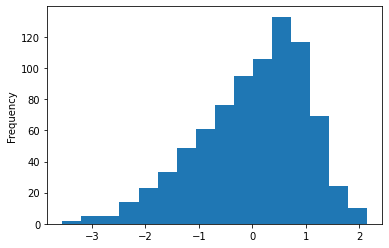

In [ ]:
data_unified['avaliacao-criticos'].plot.hist(bins=16)